In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from itertools import groupby, product



def sunspot_loc(filename):
    x_pos = []
    y_pos = []
    brightness = []
    processed_data=[]

    with open(filename) as f:
        data = f.readlines()
        for i in range(len(data)):
            entry = data[i].split()
            processed_data.append(entry)

    x_pos = [float(p[0]) for p in processed_data]
    y_pos = [float(p[1]) for p in processed_data]
    brightness = [float(p[2]) for p in processed_data]    

    x_good_pos = []
    y_good_pos = []

    x_good_pos2 = []
    y_good_pos2 = []
    circ = Circle((256, 256), radius = 218)


    for i in range(len(brightness)) :
            if brightness[i] == 0:
                x_good_pos.append(x_pos[i])
                y_good_pos.append(y_pos[i])


    sunspot = list(zip(x_good_pos , y_good_pos))

    for k in range(len(x_good_pos)):
        if circ.contains_point(sunspot[k]) == True :
                x_good_pos2.append(x_good_pos[k])
                y_good_pos2.append(y_good_pos[k])
                
                
         
    sunspot2 = list(zip(x_good_pos2 , y_good_pos2))
    sunspot2s = sorted(sunspot2 , key=lambda k: [k[1], k[0]])
    #print (sunspot2s)
    
    def Manhattan(tup1, tup2):
        return abs(tup1[0] - tup2[0]) + abs(tup1[1] - tup2[1])


    # Group Adjacent Coordinates
    # Using product() + groupby() + list comprehension
    man_tups = [sorted(sub) for sub in product(sunspot2, repeat = 2)
                                        if Manhattan(*sub) == 1]
    
    res_dict = {ele: {ele} for ele in sunspot2}
    for tup1, tup2 in man_tups:
        res_dict[tup1] |= res_dict[tup2]
        res_dict[tup2] = res_dict[tup1]
    
    res = [[*next(val)] for key, val in groupby(
            sorted(res_dict.values(), key = id), id)]
    
    # converting tuples to numpy arrays
    res = [np.array(sub) for sub in res]
    
    # sorting numpy arrays lexicographically
    res = sorted(res, key=lambda x: tuple(x[:,0]))
    
    # converting numpy arrays back to tuples
    res = [tuple(map(tuple, sub)) for sub in res]
    
    # printing result
    print("The Sunspot Coordinates are : " + str(res))
    
    #This code is contributed by Jyothi pinjala. (https://www.geeksforgeeks.org/python-group-adjacent-coordinates/)
        
    
    
    plt.scatter(x_good_pos2 , y_good_pos2 , s=0.25)
    plt.gca().invert_yaxis()
    plt.grid()
    plt.show()












The Sunspot Coordinates are : [((48.0, 301.0),), ((49.0, 228.0), (49.0, 229.0)), ((55.0, 292.0),), ((83.0, 376.0),), ((84.0, 378.0), (84.0, 377.0)), ((173.0, 161.0), (173.0, 162.0)), ((175.0, 160.0),), ((183.0, 166.0),), ((200.0, 162.0), (198.0, 161.0), (201.0, 161.0), (198.0, 163.0), (199.0, 161.0), (200.0, 161.0), (200.0, 163.0), (198.0, 162.0)), ((202.0, 160.0),), ((204.0, 162.0),), ((212.0, 159.0), (212.0, 158.0)), ((219.0, 156.0), (220.0, 155.0), (216.0, 157.0), (217.0, 156.0), (218.0, 157.0), (221.0, 156.0), (214.0, 156.0), (215.0, 155.0), (220.0, 157.0), (219.0, 155.0), (216.0, 156.0), (217.0, 155.0), (218.0, 156.0), (221.0, 155.0), (215.0, 157.0), (219.0, 157.0), (220.0, 156.0), (217.0, 157.0), (216.0, 155.0), (218.0, 155.0), (214.0, 157.0), (215.0, 156.0)), ((219.0, 156.0), (220.0, 155.0), (219.0, 159.0), (220.0, 158.0), (222.0, 158.0), (217.0, 159.0), (216.0, 157.0), (217.0, 156.0), (216.0, 160.0), (218.0, 157.0), (221.0, 156.0), (218.0, 160.0), (221.0, 159.0), (214.0, 156.0)

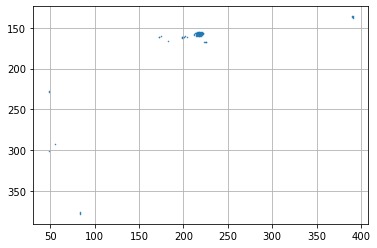

In [2]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 1 (1).txt')




The Sunspot Coordinates are : [((77.0, 287.0), (78.0, 287.0)), ((100.0, 374.0), (101.0, 374.0), (100.0, 375.0), (99.0, 373.0), (101.0, 375.0), (100.0, 373.0), (99.0, 374.0)), ((220.0, 160.0), (220.0, 161.0), (219.0, 160.0)), ((221.0, 159.0),), ((223.0, 160.0), (222.0, 160.0)), ((225.0, 162.0),), ((243.0, 163.0),), ((247.0, 161.0), (245.0, 162.0), (245.0, 161.0), (246.0, 162.0), (245.0, 160.0), (247.0, 162.0)), ((247.0, 161.0), (245.0, 162.0), (245.0, 161.0), (246.0, 162.0), (245.0, 160.0), (247.0, 162.0)), ((250.0, 160.0), (248.0, 160.0), (249.0, 160.0), (249.0, 161.0), (248.0, 159.0), (249.0, 159.0)), ((251.0, 161.0),), ((251.0, 159.0),), ((254.0, 162.0),), ((255.0, 163.0),), ((259.0, 158.0), (258.0, 158.0), (258.0, 159.0), (257.0, 157.0), (259.0, 159.0), (258.0, 157.0)), ((261.0, 159.0), (262.0, 158.0), (266.0, 158.0), (267.0, 157.0), (266.0, 155.0), (268.0, 158.0), (267.0, 160.0), (269.0, 157.0), (268.0, 155.0), (260.0, 157.0), (263.0, 156.0), (263.0, 159.0), (265.0, 156.0), (264.0,

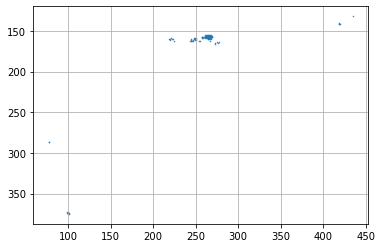

In [3]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 2 (1).txt')



The Sunspot Coordinates are : [((49.0, 188.0),), ((108.0, 217.0), (108.0, 218.0)), ((109.0, 161.0),), ((110.0, 283.0),), ((111.0, 284.0),), ((123.0, 371.0), (122.0, 370.0), (124.0, 371.0), (123.0, 370.0), (122.0, 371.0)), ((267.0, 160.0), (268.0, 160.0)), ((296.0, 158.0), (295.0, 161.0), (293.0, 162.0), (297.0, 158.0), (296.0, 161.0), (294.0, 162.0), (297.0, 161.0), (298.0, 161.0), (295.0, 159.0), (294.0, 163.0), (296.0, 159.0), (295.0, 162.0), (297.0, 159.0), (298.0, 162.0), (293.0, 161.0), (294.0, 161.0), (296.0, 157.0), (295.0, 160.0), (298.0, 163.0)), ((296.0, 158.0), (295.0, 161.0), (297.0, 158.0), (293.0, 162.0), (294.0, 162.0), (295.0, 159.0), (296.0, 159.0), (297.0, 159.0), (293.0, 161.0), (294.0, 161.0), (296.0, 157.0), (295.0, 160.0)), ((296.0, 158.0), (297.0, 158.0), (296.0, 157.0), (295.0, 160.0), (295.0, 159.0), (296.0, 159.0), (297.0, 159.0)), ((302.0, 157.0),), ((303.0, 158.0), (304.0, 158.0)), ((305.0, 163.0),), ((308.0, 158.0), (310.0, 158.0), (310.0, 155.0), (313.0, 1

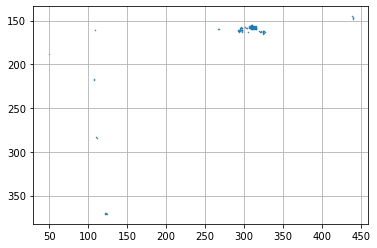

In [4]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 3 (1).txt')


The Sunspot Coordinates are : [((60.0, 181.0), (60.0, 182.0)), ((67.0, 175.0),), ((136.0, 156.0),), ((150.0, 279.0),), ((150.0, 367.0), (151.0, 367.0), (152.0, 367.0)), ((154.0, 159.0),), ((314.0, 161.0), (315.0, 161.0)), ((339.0, 162.0), (340.0, 161.0), (340.0, 162.0)), ((339.0, 162.0), (340.0, 161.0), (340.0, 164.0), (343.0, 163.0), (341.0, 164.0), (342.0, 164.0), (340.0, 165.0), (341.0, 165.0), (340.0, 162.0), (343.0, 164.0), (340.0, 163.0), (342.0, 163.0)), ((339.0, 162.0), (340.0, 161.0), (340.0, 164.0), (343.0, 163.0), (341.0, 164.0), (342.0, 164.0), (340.0, 165.0), (341.0, 165.0), (340.0, 162.0), (343.0, 164.0), (340.0, 163.0), (342.0, 163.0)), ((341.0, 160.0),), ((342.0, 159.0), (343.0, 159.0), (343.0, 158.0)), ((342.0, 159.0), (343.0, 159.0), (343.0, 158.0), (343.0, 160.0)), ((345.0, 159.0),), ((347.0, 160.0),), ((352.0, 163.0),), ((355.0, 160.0), (354.0, 158.0), (357.0, 160.0), (356.0, 158.0), (351.0, 159.0), (353.0, 159.0), (358.0, 158.0), (352.0, 160.0), (354.0, 160.0), (35

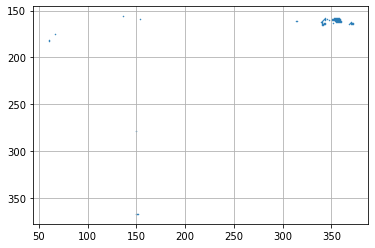

In [5]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 4 (1).txt')



The Sunspot Coordinates are : [((94.0, 167.0),), ((95.0, 169.0),), ((138.0, 439.0),), ((186.0, 365.0), (185.0, 364.0), (185.0, 365.0), (186.0, 364.0)), ((197.0, 278.0),), ((198.0, 210.0),), ((200.0, 154.0),), ((203.0, 155.0),), ((359.0, 164.0),), ((364.0, 166.0),), ((383.0, 167.0), (382.0, 165.0), (382.0, 168.0), (382.0, 167.0), (383.0, 166.0), (384.0, 166.0), (383.0, 165.0), (381.0, 166.0), (384.0, 165.0), (383.0, 168.0), (382.0, 166.0)), ((383.0, 167.0), (382.0, 165.0), (382.0, 167.0), (383.0, 166.0), (384.0, 166.0), (383.0, 165.0), (381.0, 166.0), (384.0, 165.0), (382.0, 166.0)), ((384.0, 162.0),), ((385.0, 161.0),), ((386.0, 162.0),), ((386.0, 164.0), (386.0, 165.0), (385.0, 164.0)), ((392.0, 162.0), (393.0, 161.0), (394.0, 162.0), (393.0, 164.0), (395.0, 161.0), (396.0, 164.0), (397.0, 163.0), (396.0, 161.0), (395.0, 164.0), (398.0, 164.0), (394.0, 165.0), (390.0, 163.0), (393.0, 162.0), (391.0, 163.0), (393.0, 165.0), (395.0, 162.0), (392.0, 163.0), (396.0, 162.0), (395.0, 165.0)

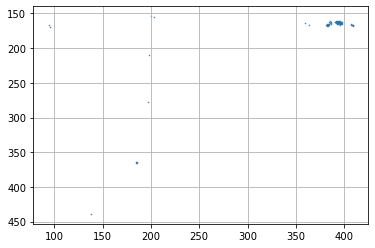

In [6]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 5 (1).txt')



The Sunspot Coordinates are : [((130.0, 162.0),), ((131.0, 161.0),), ((159.0, 451.0),), ((208.0, 468.0),), ((221.0, 363.0), (222.0, 363.0), (223.0, 363.0), (222.0, 362.0), (223.0, 362.0)), ((221.0, 363.0), (222.0, 363.0), (223.0, 363.0), (222.0, 362.0), (223.0, 362.0)), ((224.0, 154.0), (225.0, 154.0), (226.0, 154.0), (226.0, 153.0), (227.0, 153.0)), ((224.0, 154.0), (225.0, 154.0), (226.0, 154.0), (226.0, 153.0), (227.0, 153.0)), ((246.0, 155.0), (247.0, 155.0)), ((250.0, 153.0), (250.0, 154.0), (251.0, 153.0), (253.0, 155.0), (251.0, 154.0), (252.0, 154.0), (253.0, 154.0)), ((251.0, 209.0),), ((418.0, 171.0), (419.0, 171.0), (417.0, 170.0), (418.0, 170.0), (419.0, 170.0), (417.0, 169.0), (418.0, 169.0), (417.0, 172.0), (418.0, 172.0), (417.0, 171.0)), ((419.0, 166.0), (419.0, 167.0)), ((420.0, 172.0),), ((421.0, 168.0),), ((421.0, 173.0),), ((424.0, 165.0), (425.0, 166.0), (423.0, 166.0), (426.0, 165.0), (427.0, 166.0), (426.0, 168.0), (422.0, 167.0), (424.0, 167.0), (426.0, 167.0), 

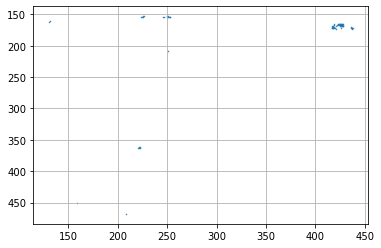

In [7]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 6 (1).txt')



The Sunspot Coordinates are : [((141.0, 167.0),), ((149.0, 159.0),), ((238.0, 363.0), (239.0, 362.0), (239.0, 363.0), (238.0, 362.0)), ((245.0, 153.0), (245.0, 154.0), (246.0, 153.0), (244.0, 153.0)), ((272.0, 154.0), (274.0, 154.0), (271.0, 155.0), (273.0, 155.0), (271.0, 154.0), (272.0, 153.0), (273.0, 154.0), (272.0, 155.0), (271.0, 153.0)), ((429.0, 167.0),), ((429.0, 171.0), (432.0, 172.0), (431.0, 171.0), (430.0, 173.0), (432.0, 171.0), (430.0, 172.0), (431.0, 173.0), (429.0, 173.0), (429.0, 172.0), (430.0, 171.0)), ((431.0, 169.0),), ((432.0, 174.0),), ((432.0, 165.0),), ((434.0, 172.0),), ((434.0, 168.0), (435.0, 168.0), (436.0, 168.0), (434.0, 167.0), (435.0, 167.0), (436.0, 167.0), (437.0, 167.0), (434.0, 166.0), (437.0, 166.0)), ((435.0, 171.0), (434.0, 168.0), (435.0, 168.0), (438.0, 167.0), (436.0, 168.0), (437.0, 171.0), (438.0, 170.0), (437.0, 168.0), (439.0, 170.0), (434.0, 169.0), (435.0, 169.0), (434.0, 166.0), (437.0, 166.0), (436.0, 169.0), (438.0, 171.0), (437.0, 1

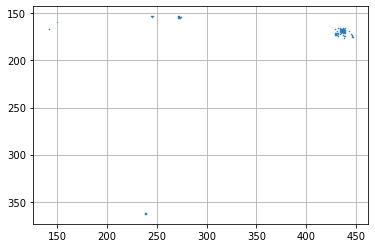

In [8]:
sunspot_loc('E:\downloads\Sunspot (1)\sunspots 7 (1).txt')



In [9]:
pi = np.pi


def long_lat(x ,y ,Q1 , Q2 , R ,P , B0 ,L0):
    
    P = P*(pi/180)
    B0 = B0*(pi/180)
    L0 = L0*(pi/180)
    a = 0.53*(pi/180)
    
    r = ((256-x)**2+(256-y)**2)**(0.5)

    theta = np.arctan((256-x)/(256-y)) + Q1

    rho = np.arcsin(r / R) - (a * (r / (2*(R))))

    
    delta = (P - theta) + Q2
    print (delta*(180/pi))
    
    B = np.arcsin(np.sin(B0)*np.cos(rho) + np.cos(B0)*np.sin(rho)*np.cos(delta))
    L = np.arcsin((np.sin(rho)*np.sin(delta))/(np.cos(B))) + L0
    
    B = B * (180/pi)
    L = L * (180/pi)
    
    return B , L

long_lat(229 , 234 , pi , 2*pi , 75 , 2.1 , -3 , 139.5)


131.27365797044422


(-20.551999164926546, 161.28993307366488)

In [24]:
pi = np.pi


def long_lat(x, y, R, P, B0, L0):
    
    P = P*(pi/180)
    B0 = B0*(pi/180)
    L0 = L0*(pi/180)
    a = 0.53*(pi/180)
    Q1 = pi
    Q2 = 2*pi
    
    r = ((256-x)**2+(256-y)**2)**(0.5)

    if x >> 256 and y >> 256:
        Q = 0
        
    if  y << 256:
        Q = Q1
        
    if x << 256 and y >> 256:
        Q = Q2    
    
    theta = np.arctan((256-x)/(256-y)) + Q

    rho = np.arcsin(r / R) - (a * (r / (2*(R))))
   

    
    delta = (P - theta) + Q2
    print (delta*(180/pi))
    
    B = np.arcsin(np.sin(B0)*np.cos(rho) + np.cos(B0)*np.sin(rho)*np.cos(delta))
    L = np.arcsin((np.sin(rho)*np.sin(delta))/(np.cos(B))) + L0
    
    B = B * (180/pi)
    L = L * (180/pi)
  
    
    return B , L , rho

long_lat(229 , 234 , 75 , 2.1 , -3 , 139.5)

131.27365797044422


(-20.551999164926546, 161.28993307366488, 0.4807813517252906)